In [1]:
# 1. Imports và cài đặt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

Trần Phương Anh - 6351071002


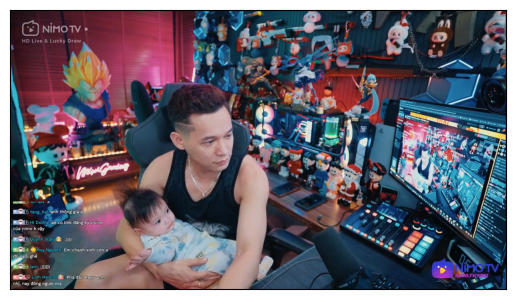

In [10]:
# 2. Đọc và hiển thị ảnh gốc
# Đảm bảo file 'dog.png' có trong cùng thư mục
print("Trần Phương Anh - 6351071002")
image = Image.open('DoMiXi.png')
axes = plt.axes(xticks=[], yticks=[])
axes.imshow(image)
plt.show() # Thêm plt.show() để hiển thị ảnh ngay lập tức

In [11]:
# 3. Chuẩn bị dữ liệu
print("Trần Phương Anh - 6351071002")
imarr = np.array(image)
imarr_rgb = imarr[:, :, :3]

rows = imarr_rgb.shape[0]
cols = imarr_rgb.shape[1]

# Chia tỷ lệ giá trị pixel về khoảng 0...1 và reshape
# (rows * cols) là tổng số pixel, 3 là số kênh màu (RGB)
data = imarr_rgb / 255.0
data = data.reshape(rows * cols, 3)
print("Dữ liệu sau khi reshape:", data.shape) # Hiển thị shape của data

Trần Phương Anh - 6351071002
Dữ liệu sau khi reshape: (2073600, 3)


In [5]:
# 4. Áp dụng K-Means
# n_clusters = 32 nghĩa là chúng ta sẽ giảm ảnh xuống còn 32 màu
kmeans = KMeans(n_clusters = 32, max_iter=300, random_state=0, n_init=10) # Thêm random_state và n_init để tránh cảnh báo
kmeans.fit(data)

# Thay thế mỗi pixel bằng tâm cluster gần nhất
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [7]:
# 5. Tái tạo ảnh
# new_colors là mảng 3 kênh, nên chúng ta cần reshape về (rows, cols, 3)

# Dùng một tuple mới chỉ rõ kích thước 3 kênh
new_img_shape = (rows, cols, 3)
img_recolored = new_colors.reshape(new_img_shape) # Dùng kích thước 3 kênh đã định nghĩa

# Phục hồi giá trị pixel về khoảng 0-255 và chuyển đổi thành ảnh PIL
img_recolored = img_recolored * 255
new_img = Image.fromarray(img_recolored.astype(np.uint8))
new_img.save('compressed_img_32color.png')

In [8]:
# 6. Lưu ảnh mới
new_img.save('compressed_img_32color.png') # Đổi tên file để rõ ràng hơn

Trần Phương Anh - 6351071002


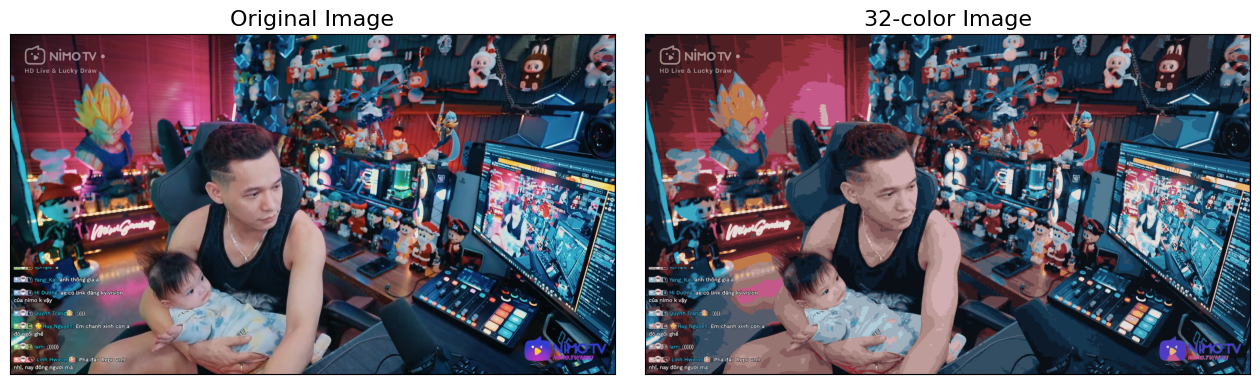

In [9]:
# 7. Hiển thị ảnh gốc và ảnh đã nén để so sánh
print("Trần Phương Anh - 6351071002")
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored.astype(np.uint8)) # Hiển thị ảnh đã nén
ax[1].set_title('32-color Image', size=16)
plt.show()